In [1]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

# Specify the path to your .npy file
file_path = '/content/drive/MyDrive/X_train_padding.npy'

# Load the .npy file
x = np.load(file_path)

# Print the array values
print("Array Values:")
print(x)


Array Values:
[[[-2.85120973e-06  3.35526079e-06  1.59886599e-06 ...  1.46992363e-06
   -5.60908893e-06  4.01809921e-05]
  [-4.69773840e-06  3.35521236e-06  1.43044065e-06 ...  2.47816229e-06
   -3.25939300e-06  4.95803106e-05]
  [-2.68373401e-06  4.02655951e-06  9.26316488e-07 ...  2.47930575e-06
   -7.04526926e-08  4.70623309e-05]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 1.04389210e-05 -4.26879387e-06  3.02814669e-06 ... -4.19603680e-07
    2.79208393e-07 -1.41459732e-05]
  [ 1.17815825e-05 -3.93303299e-06  2.69243674e-06 ... -1.42561487e-06
   -3.92174883e-07 -1.56555834e-05]
  [ 1.17814507e-05 -9.11684822e-07  4.03521881e-06 ... -2.43162663e-06
   -1.06355515e-06 -1.69973464e-05]
  ...
  [ 7.518

In [3]:
len(x)

203

In [4]:
x.shape

(203, 12246, 12)

In [5]:
import numpy as np

# Specify the path to your .npy file
file_path = '/content/drive/MyDrive/y_train_padding.npy'

# Load the .npy file
y = np.load(file_path)

# Print the array values
print("Array Values:")
print(y)


Array Values:
[[[  7.80701727  14.62264061  32.20779657 ...  52.83019066   8.73786449
    62.36842453]
  [  7.80701727  14.62264061  32.20779657 ...  52.83019066   8.73786449
    62.36842453]
  [  7.80701727  14.62264061  32.20779657 ...  52.83019066   8.73786449
    62.36842453]
  ...
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]]

 [[  7.19298229  11.32075489  28.05195093 ...  45.28301954   9.61165108
    64.73684728]
  [  7.19298229  11.32075489  28.05195093 ...  45.28301954   9.61165108
    64.73684728]
  [  7.19298229  11.32075489  28.05195093 ...  45.28301954   9.61165108
    64.73684728]
  ...
  [  3.60272638  25.47169924  45.7881403  ... 107.16980696  53.3009702
    70.26316345]
  [  3.60155448  25.47169924  45.77425957 ... 107.16980696  53.3009702
    70.26316345]
  [  3.60038236  25

In [6]:
len(y)

203

In [7]:
y.shape

(203, 12246, 14)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X is your input data and Y is your target data
# Convert your numpy arrays to PyTorch tensors
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32)

In [9]:
X

tensor([[[-2.8512e-06,  3.3553e-06,  1.5989e-06,  ...,  1.4699e-06,
          -5.6091e-06,  4.0181e-05],
         [-4.6977e-06,  3.3552e-06,  1.4304e-06,  ...,  2.4782e-06,
          -3.2594e-06,  4.9580e-05],
         [-2.6837e-06,  4.0266e-06,  9.2632e-07,  ...,  2.4793e-06,
          -7.0453e-08,  4.7062e-05],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[ 1.0439e-05, -4.2688e-06,  3.0281e-06,  ..., -4.1960e-07,
           2.7921e-07, -1.4146e-05],
         [ 1.1782e-05, -3.9330e-06,  2.6924e-06,  ..., -1.4256e-06,
          -3.9217e-07, -1.5656e-05],
         [ 1.1781e-05, -9.1168e-07,  4.0352e-06,  ..., -2.4316e-06,
          -1.0636e-06, -1.6997e-05],
         ...,
         [ 7.5182e-06,  2

In [10]:
Y

tensor([[[  7.8070,  14.6226,  32.2078,  ...,  52.8302,   8.7379,  62.3684],
         [  7.8070,  14.6226,  32.2078,  ...,  52.8302,   8.7379,  62.3684],
         [  7.8070,  14.6226,  32.2078,  ...,  52.8302,   8.7379,  62.3684],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[  7.1930,  11.3208,  28.0520,  ...,  45.2830,   9.6117,  64.7368],
         [  7.1930,  11.3208,  28.0520,  ...,  45.2830,   9.6117,  64.7368],
         [  7.1930,  11.3208,  28.0520,  ...,  45.2830,   9.6117,  64.7368],
         ...,
         [  3.6027,  25.4717,  45.7881,  ..., 107.1698,  53.3010,  70.2632],
         [  3.6016,  25.4717,  45.7743,  ..., 107.1698,  53.3010,  70.2632],
         [  3.6004,  25.4717,  45.7604,  ..., 107.1698,  53.3010,  70.2632]],

        [[  3.5992,  25.4717,  45.7465,  ...

In [11]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("GPU is not available. Using CPU.")

GPU is available!


In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # ((n+ 2p -f) / st ) +1  # 16
        self.ff= nn.Linear(12,1728) # 12**3                (203, 12246, 12)                 (203,12246,1728)    (203,12246,108,16)   16*108 = 1728
                                                                                                    # reshape (203*12246 , 108 , 16)
        self.conv1 = nn.Conv1d(108, 256, kernel_size=3, stride=1, padding=1)   #16
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2) # 2  # b2t 9
        self.conv2 = nn.Conv1d(256, 512, kernel_size=3, stride=1, padding=1)   #  8
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2) #  Floor((n-f+2p)/s) +1  #4
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 4, 128) # 4 --> sequence length //4(34an 3aml 2 maxpool kol wa7da b 2)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 14)  # Output


    def forward(self, x):
        x= self.ff(x)
        #x.size(0)
        x = x.view(x.size(0)*x.size(1), 108, 16)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x


In [13]:
import torch
import torch.nn as nn

class MyLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(MyLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0.detach(), c0.detach()))

        # Apply the fully connected layer to each time step
        out = self.fc(out)

        return out


# Define the input and target dimensions
input_dim = 14
output_dim = 14
hidden_dim = 64
num_layers = 3    #(N,L,D*H)
batch_size = 2




In [14]:
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [15]:
torch.cuda.empty_cache()

In [16]:
import torch
import torch.nn as nn

class CombinedModel(nn.Module):
    def __init__(self):
        super(CombinedModel, self).__init__()
        self.cnn_model = CNN()
        self.lstm_model = MyLSTMModel(input_dim, hidden_dim, num_layers, output_dim)

    def forward(self, x):
        # Forward pass through CNN
        cnn_output = self.cnn_model(x)

        # Reshape CNN output to fit LSTM input shape  output of cnn  (203 * 12246, 14)   # lstm input
        cnn_output = cnn_output.view(-1, 12246,14)

        # Forward pass through LSTM using CNN output
        lstm_output = self.lstm_model(cnn_output)

        return lstm_output

# Create instances of your CNN and LSTM models
# cnn_model = CNN()
# lstm_model = MyLSTMModel(input_dim, hidden_dim, num_layers, output_dim)

# if torch.cuda.is_available():
#     cnn_model = cnn_model.to('cuda')
#     lstm_model = lstm_model.to('cuda')

# Create the combined model
combined_model = CombinedModel().to('cuda')

# Print the combined model architecture
print(combined_model)


CombinedModel(
  (cnn_model): CNN(
    (ff): Linear(in_features=12, out_features=1728, bias=True)
    (conv1): Conv1d(108, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (relu1): ReLU()
    (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(1,))
    (relu2): ReLU()
    (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (fc1): Linear(in_features=2048, out_features=128, bias=True)
    (relu3): ReLU()
    (fc2): Linear(in_features=128, out_features=14, bias=True)
  )
  (lstm_model): MyLSTMModel(
    (lstm): LSTM(14, 64, num_layers=3, batch_first=True)
    (fc): Linear(in_features=64, out_features=14, bias=True)
  )
)


In [17]:
# Define your loss function (e.g., Mean Squared Error) and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(combined_model.parameters(), lr=0.001)

Epoch [1/20], Avg. Loss: 1524.4901
Epoch [2/20], Avg. Loss: 1213.7665
Epoch [3/20], Avg. Loss: 1024.4761
Epoch [4/20], Avg. Loss: 905.1551
Epoch [5/20], Avg. Loss: 821.9664
Epoch [6/20], Avg. Loss: 769.5741
Epoch [7/20], Avg. Loss: 735.4794
Epoch [8/20], Avg. Loss: 713.3069
Epoch [9/20], Avg. Loss: 702.1328
Epoch [10/20], Avg. Loss: 692.7860
Epoch [11/20], Avg. Loss: 689.3267
Epoch [12/20], Avg. Loss: 686.4839
Epoch [13/20], Avg. Loss: 684.8369
Epoch [14/20], Avg. Loss: 685.8810
Epoch [15/20], Avg. Loss: 684.9276
Epoch [16/20], Avg. Loss: 685.2433
Epoch [17/20], Avg. Loss: 685.0865
Epoch [18/20], Avg. Loss: 683.4857
Epoch [19/20], Avg. Loss: 682.7495
Epoch [20/20], Avg. Loss: 683.5835


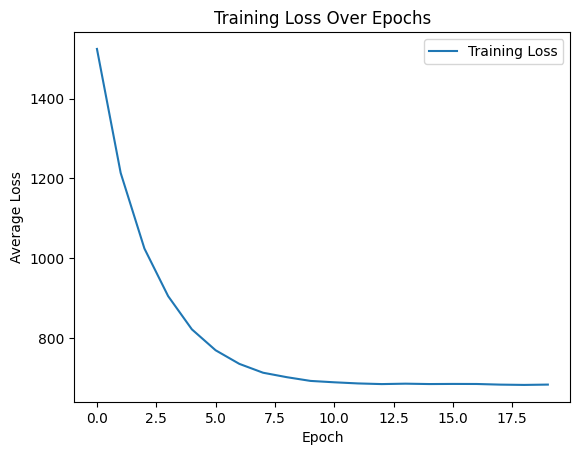

In [18]:
import matplotlib.pyplot as plt
# Training loop with loss plotting
num_epochs = 20
all_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_data, batch_target in dataloader:
        if torch.cuda.is_available():
          batch_data, batch_target  = batch_data.to('cuda'), batch_target.to('cuda')
        optimizer.zero_grad()
        outputs = combined_model(batch_data)
        loss = criterion(outputs, batch_target)
        loss.backward()
        optimizer.step()

        # Accumulate the loss for the current batch
        epoch_loss += loss.item()

    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(dataloader)

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Avg. Loss: {avg_epoch_loss:.4f}')

    # Save the average loss for plotting
    all_losses.append(avg_epoch_loss)

# Plot the training loss
plt.plot(all_losses, label='Training Loss')
plt.savefig('LSTM_cnn.png')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.show()
